In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pingouin import wilcoxon

os.makedirs('stats', exist_ok=True)
os.makedirs('imgs', exist_ok=True)
sns.set_theme(style="whitegrid")


In [2]:
def process_results(df):
    df[['statistical_parity', 'equal_opportunity', 'average_odds']] = df[['statistical_parity', 'equal_opportunity', 'average_odds']].abs()
    grouped = df.groupby(['variable', 'fold']).agg('mean').reset_index()
    return grouped

In [3]:
os.makedirs('grouped', exist_ok=True)
for file in os.listdir('results'):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join('results', file), index_col=0)
        grouped_df = process_results(df)
        grouped_df.to_csv(f"results/{file}")
        print(f"Processed {file}:")
        print(grouped_df.head())

Processed transformed_compas_v_score_text_replace_synonyms_rf.csv:
  variable  fold  statistical_parity  equal_opportunity  average_odds
0      age     0            0.015761           0.044969      0.228217
1      age     1            0.008317           0.047108      0.254949
2      age     2            0.012456           0.041052      0.231511
3      age     3            0.010550           0.039855      0.255589
4      age     4            0.015745           0.045019      0.269637
Processed transformed_compas_score_text_add_noise_xgb.csv:
  variable  fold  statistical_parity  equal_opportunity  average_odds
0      age     0            0.002932           0.037526      0.222745
1      age     1            0.001575           0.044715      0.253164
2      age     2            0.003923           0.035758      0.230237
3      age     3            0.003797           0.035925      0.255823
4      age     4            0.001093           0.042021      0.267488
Processed transformed_compas_v_sco

In [4]:
def make_plot(age_trans, base_age, feature_name, model_name, transformation):
  fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

  sns.boxplot(data=age_trans[['statistical_parity', 'equal_opportunity', 'average_odds']], ax=ax[0])
  sns.boxplot(data=base_age[['statistical_parity', 'equal_opportunity', 'average_odds']], ax=ax[1])
  ax[0].set_xticklabels(['Statistical Parity', 'Equal Opportunity', 'Average Odds'])
  ax[1].set_xticklabels(['Statistical Parity', 'Equal Opportunity', 'Average Odds'])
  ax[0].set_title(f'Transformed feature')
  ax[1].set_title('Base Dataset')
  plt.savefig(f'imgs/{feature_name}_{model_name}_feature_{transformation}.pdf', bbox_inches='tight')
  plt.show()

In [13]:
def wilcoxon_test(base_age, age, feature_name, model_name, transformation):
    stats_two_sided = pd.DataFrame()
    stats_greater = pd.DataFrame()
    os.makedirs('stats_two_sided', exist_ok=True)
    os.makedirs('stats_greater', exist_ok=True)
    for metric in ['statistical_parity', 'equal_opportunity', 'average_odds']:
        print(f"Wilcoxon test for {metric}:")
        test_two_sided = wilcoxon(base_age[metric], age[metric], alternative='two-sided')
        test_two_sided['metric'] = metric
        stats_two_sided = pd.concat([stats_two_sided, test_two_sided], ignore_index=True)

        test_greater = wilcoxon(base_age[metric], age[metric], alternative='less')
        test_greater['metric'] = metric
        stats_greater = pd.concat([stats_greater, test_greater], ignore_index=True)

    stats_two_sided[['p-val', 'CLES', 'metric']].to_csv(f'stats_two_sided/{feature_name}_{model_name}_{transformation}_wilcoxon.csv', index=False)
    stats_greater[['p-val', 'CLES', 'metric']].to_csv(f'stats_greater/{feature_name}_{model_name}_{transformation}_wilcoxon.csv', index=False)

Analyzing feature: v


/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_46842/2883019539.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Statistical Parity', 'Equal Opportunity', 'Average Odds'])
/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_46842/2883019539.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Statistical Parity', 'Equal Opportunity', 'Average Odds'])


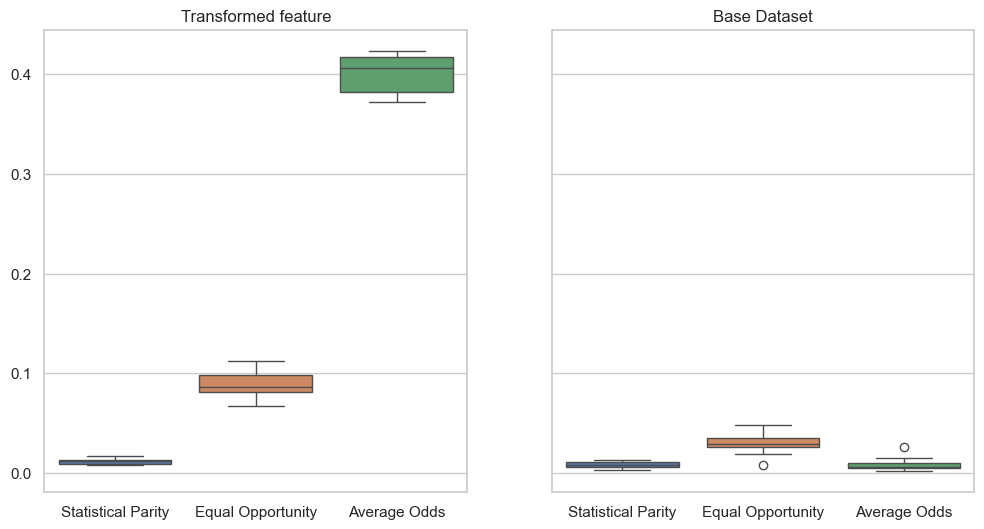

Wilcoxon test for statistical_parity:
Wilcoxon test for equal_opportunity:
Wilcoxon test for average_odds:
Analyzing feature: score


/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_46842/2883019539.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Statistical Parity', 'Equal Opportunity', 'Average Odds'])
/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_46842/2883019539.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Statistical Parity', 'Equal Opportunity', 'Average Odds'])


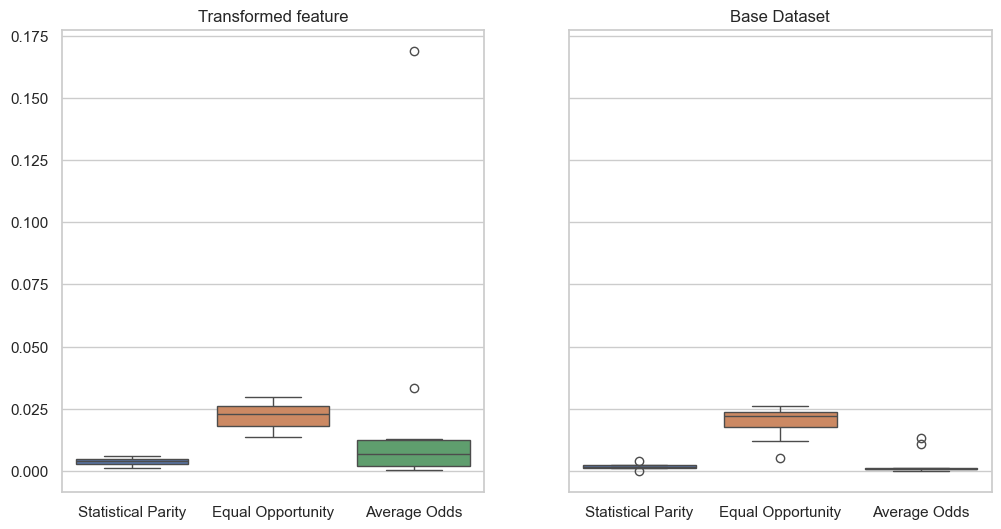

Wilcoxon test for statistical_parity:
Wilcoxon test for equal_opportunity:
Wilcoxon test for average_odds:
Analyzing feature: v


/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_46842/2883019539.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Statistical Parity', 'Equal Opportunity', 'Average Odds'])
/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_46842/2883019539.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Statistical Parity', 'Equal Opportunity', 'Average Odds'])


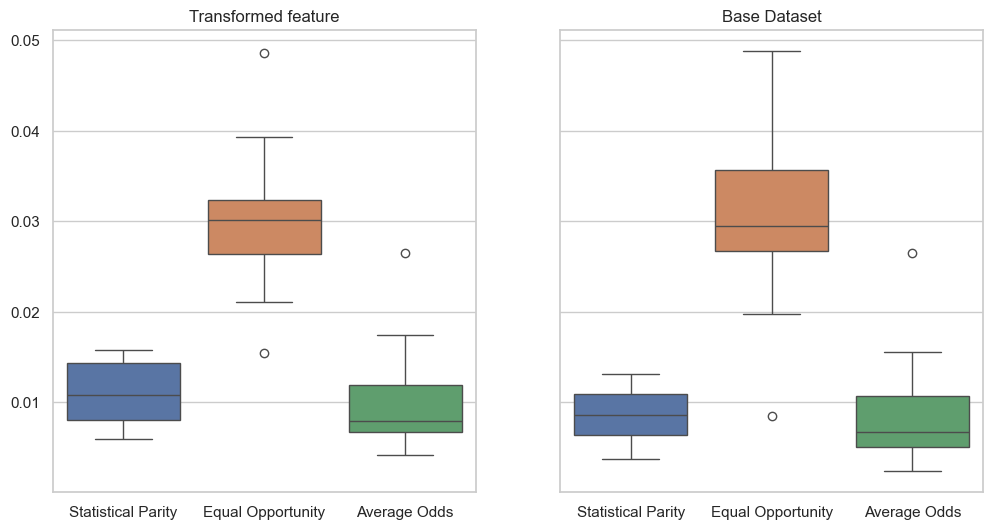

Wilcoxon test for statistical_parity:
Wilcoxon test for equal_opportunity:
Wilcoxon test for average_odds:
Analyzing feature: v


/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_46842/2883019539.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Statistical Parity', 'Equal Opportunity', 'Average Odds'])
/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_46842/2883019539.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Statistical Parity', 'Equal Opportunity', 'Average Odds'])


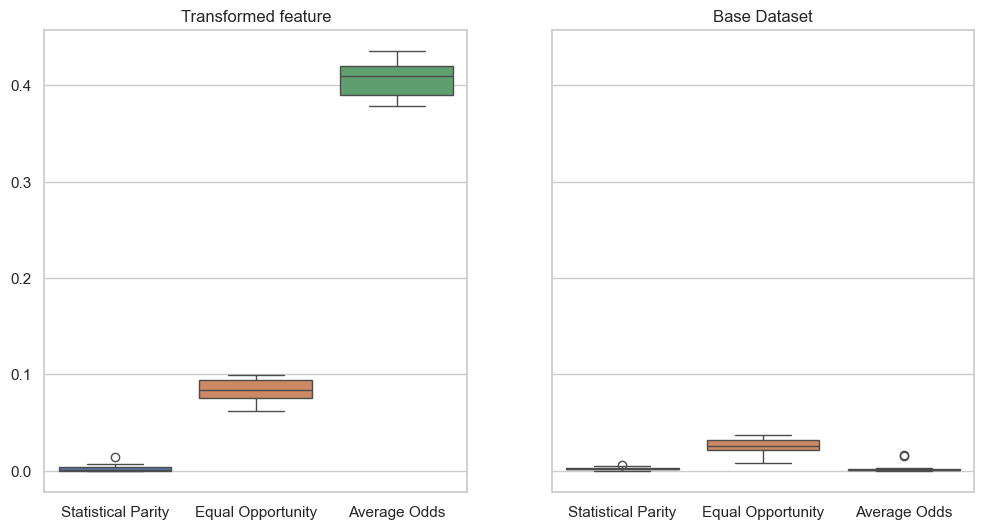

Wilcoxon test for statistical_parity:
Wilcoxon test for equal_opportunity:
Wilcoxon test for average_odds:
Analyzing feature: v


/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_46842/2883019539.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Statistical Parity', 'Equal Opportunity', 'Average Odds'])
/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_46842/2883019539.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Statistical Parity', 'Equal Opportunity', 'Average Odds'])


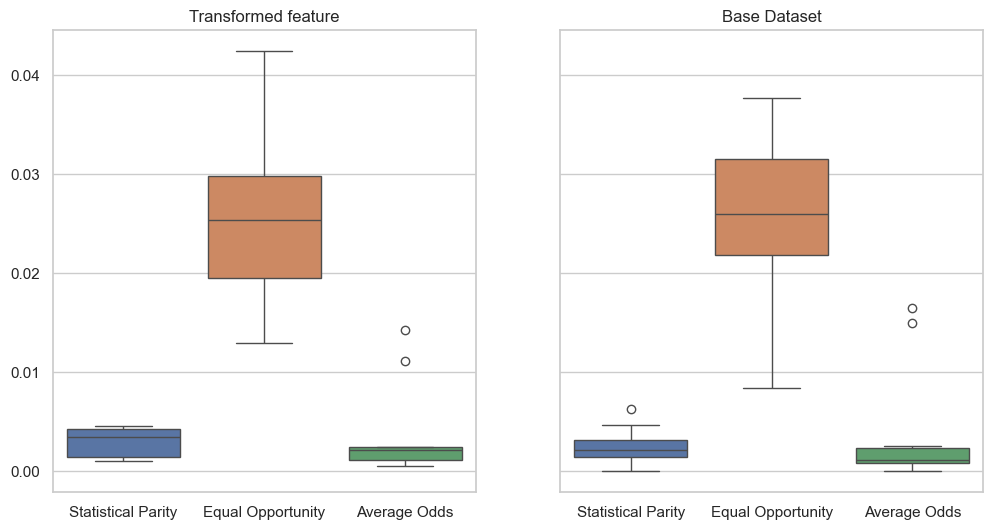

Wilcoxon test for statistical_parity:
Wilcoxon test for equal_opportunity:
Wilcoxon test for average_odds:
Analyzing feature: score


/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_46842/2883019539.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Statistical Parity', 'Equal Opportunity', 'Average Odds'])
/var/folders/4c/mgvn0dc97_9gst9l7jbv9n640000gn/T/ipykernel_46842/2883019539.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Statistical Parity', 'Equal Opportunity', 'Average Odds'])


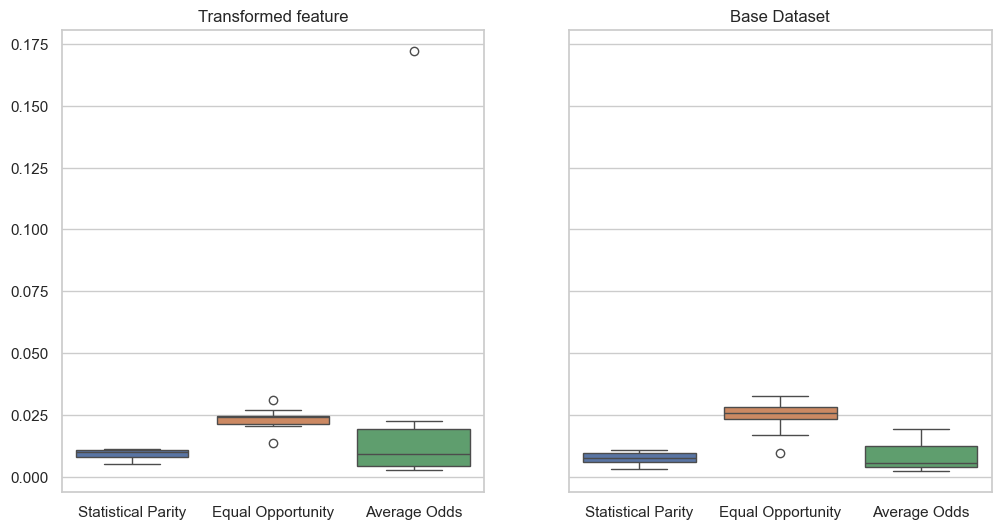

Wilcoxon test for statistical_parity:
Wilcoxon test for equal_opportunity:
Wilcoxon test for average_odds:


In [14]:
base_results = ['compas_rf.csv', 'compas_xgb.csv']

for ris in os.listdir('results'):
    if ris in base_results:
        continue
    df = pd.read_csv(os.path.join('results', ris), index_col=0)
    if '_rf' in ris:
        model = 'rf'
        base = pd.read_csv('results/compas_rf.csv', index_col=0)
    else:
        model = 'xgb'
        base = pd.read_csv('results/compas_xgb.csv', index_col=0)

    feature = ris.split('_')[2]
    transformation = ris.split('_')[-2].replace('.csv', '')
    print(f"Analyzing feature: {feature}")
    df = df[df['variable'] == feature]
    base = base[base['variable'] == feature]
    make_plot(df, base, feature, model, transformation)
    wilcoxon_test(base, df, feature, model, transformation)


## Table setup

In [3]:
full_table = pd.DataFrame()

for stats in os.listdir('stats_two_sided'):
    if 'rf_' in stats:
        df_stats = pd.read_csv(os.path.join('stats_two_sided', stats))
        feature = stats.split('_')[0]
        df_stats = df_stats.pivot_table(columns='metric', values='p-val')
        df_stats['feature'] = feature
        full_table = pd.concat([full_table, df_stats], axis=0)


In [4]:
full_table.columns = ['AOD', 'EOD', 'SP', 'Feature']

In [5]:
full_table = full_table[['Feature', 'SP', 'AOD', 'EOD']]

In [6]:
full_table.to_latex('table_rf.tex', index=False, float_format="%.3f")

In [7]:
full_table = pd.DataFrame()

for stats in os.listdir('stats_two_sided'):
    if 'xgb_' in stats:
        df_stats = pd.read_csv(os.path.join('stats_two_sided', stats))
        feature = stats.split('_')[0]
        df_stats = df_stats.pivot_table(columns='metric', values='p-val')
        df_stats['feature'] = feature
        full_table = pd.concat([full_table, df_stats], axis=0)

full_table.columns = ['AOD', 'EOD', 'SP', 'Feature']
full_table = full_table[['Feature', 'SP', 'AOD', 'EOD']]
full_table.to_latex('table_xgb.tex', index=False, float_format="%.3f")